In [6]:
import os
import glob
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

# get location of pf-ci json files
#pfci_file_location = os.path.join('/Users/rmandern/code/data_repository/Mapol/OHminus', 'qed-fci', '*.json')
#pcqed_file_location = os.path.join('/Users/rmandern/code/data_repository/Mapol/OHminus', 'pcqed_data', '*.json')
csfci_file_location = os.path.join('/Users/jfoley19/Code/data_repository/Mapol/OHminus/qed-fci', 'coherent_state', '*.json')
pfci_file_location = os.path.join('/Users/jfoley19/Code/data_repository/Mapol/OHminus', 'qed-fci', '*.json')
pcqed_file_location = os.path.join('/Users/jfoley19/Code/data_repository/Mapol/OHminus', 'pcqed_data', '*.json')

# get pf-ci file names
csfci_filenames = glob.glob(csfci_file_location)
pfci_filenames = glob.glob(pfci_file_location)
pcqed_filenames = glob.glob(pcqed_file_location)

# get number of the pf-ci json files
n_files = len(pfci_filenames)

# get number of cs-fci json files
n_files_cs = len(csfci_filenames)

print(F' There are {n_files} PF-CI files and {n_files_cs} CS-FCI files')

# pcqed files
n_files_2 = len(pcqed_filenames)

#print(pcqed_filenames[0])
#print(pcqed_filenames[1])
#print(pcqed_filenames[2])
#print(pcqed_filenames[3])
#print(pcqed_filenames[4])
#print(pcqed_filenames[5])
pcqed_pn_file = pcqed_filenames[5]
pcqed_cs_file = pcqed_filenames[1]

print(pcqed_pn_file)
print(pcqed_cs_file)

pcqed_pn_data = json.load(open(pcqed_pn_file))
pcqed_cs_data = json.load(open(pcqed_cs_file))

 There are 6 PF-CI files and 6 CS-FCI files
/Users/jfoley19/Code/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_PCQED_0.05_0.21927747.json
/Users/jfoley19/Code/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_CS_PCQED_0.05_0.21927747.json


The block below grabs data from the raw PCQED json files and computes the ground state energies
and errors for the displaced and non-displaced results for the desired sizes of the photonic Fock space
(2, 3, 5, 9, 17, 33).
It can be skipped because this data is now stored in the following files:

`~/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_PCQED_0.05_0.21927747.json`
`~/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_CS_PCQED_0.05_0.21927747.json`


In [ ]:
file_cs_20 = "/Users/jfoley19/Code/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_PCQED_Origin_Dependence_CS_20_ang_0.21927747-2.json"
file_cs_0 = "/Users/jfoley19/Code/data_repository/Mapol/OHminus/pcqed_data/OH-_6-31G_PCQED_Origin_Dependence_CS_0_ang_0.21927747-2.json"

data_cs_20 = json.load(open(file_cs_20))
data_cs_0 = json.load(open(file_cs_0))

en_cs_20 = data_cs_20["return_result"]
en_cs_0 = data_cs_0["return_result"]

pl = data_cs_20["Photon_list"]
target_pl = [2, 3, 5, 9, 17, 33]

origin_en = []
disp_en = []
en_error = []
ctr=-1
for p in pl:
    ctr += 1
    if p in target_pl:
        print(F' {p} is in target_pl')
        origin_en.append(en_cs_0[ctr][0])
        disp_en.append(en_cs_20[ctr][0])
        en_error.append(en_cs_20[ctr][0]-en_cs_0[ctr][0])
        print(origin_en)
        print(disp_en)
        print(en_error)
    else:
        print(F' {p} is not in target_pl')

In [ ]:
print(en_error)

In [7]:
photon_count = pcqed_cs_data["model"]["number_of_photon_states"]
pcqed_pn_errors = pcqed_pn_data["origin_dependent_error"]
pcqed_cs_errors = pcqed_cs_data["origin_dependent_error"]
print(photon_count, pcqed_pn_errors, pcqed_cs_errors)

[2, 3, 5, 9, 17, 33] [1.1973436651193907, 0.8846499098818441, 0.5030561682658288, 0.1517958442292695, 0.003426788843057693, 1.298019469686551e-10] [-5.115907697472721e-13, -4.973799150320701e-13, -4.973799150320701e-13, -4.831690603168681e-13, -4.547473508864641e-13, -4.973799150320701e-13]


In [12]:

# create numpy array to hold the number of photonic fock states
pn = np.zeros(n_files)
# create numpy array to hold the displacement error
er = np.zeros(n_files)

# loop over pfci json files
ctr = 0
for f in pfci_filenames:
    # load json file
    data = json.load(open(f))
    # get data field with number of photonic fock states
    n = data["model"]["maximum_photon_occupation_state"]
    # get data field with origin dependent error
    error = data["origin_dependent_error"]
    # store n to numpy array
    pn[ctr] = n+1
    # store error to numpy array
    er[ctr] = error
    # increment counter
    ctr += 1

# loop over csfci json files
ctr = 0

# create numpy array to hold the displacement error
cs_er = np.zeros(n_files)
for f in csfci_filenames:
    # load json file
    data = json.load(open(f))
    # get data field with origin dependent error
    error = data["origin_dependent_error"]
    # store error to numpy array
    cs_er[ctr] = error
    # increment counter
    ctr += 1

# find indices sorted from lowest to highest photonic fock state numbers
idx = np.flip(np.argsort(pn))


x_pfci = pn[idx]
y_pfci = er[idx]

x_pcqed_pn = np.flip(np.array(photon_count))
y_pcqed_pn = np.flip(np.array(pcqed_pn_errors))


x_pcqed_cs = np.flip(np.array(photon_count))
y_pcqed_cs= np.flip(np.array(pcqed_cs_errors))

y_csfci = np.flip(np.array(cs_er))

#N_p = np.array([3, 5, 7, 9, 11, 13, 15, 17, 33])
#error = np.array([0.8846499098818299,0.5030561682658288,0.28350180325411145,0.15179584422928372,0.0744678498403033,0.03215178125074658,0.011680933216794642,0.0034267888430434823,1.298161578233703e-10])
# N_pc = N_p[idx]
# err = error[idx]

coef_pfci = np.polyfit(x_pfci, y_pfci, 5)

coef_pcqed = np.polyfit(x_pcqed_pn, y_pcqed_pn, 5)

def poly_eval(x_vals, a_vals, order):
    """ Function to evaluate a polynomial  or order 2, 3, or 4 from np.polyfit
        Arguments
        ---------
        x_vals : array of floats
            the x values you want to evaluate the fit on
        a_vals : array of floats
            the coefficient of the polynomial
        order : int
            the order of the polynomial - accepts 2, 3, or 4

    """
    if order==5:
        return a_vals[0] * x_vals ** 5 + a_vals[1] * x_vals ** 4 + a_vals[2] * x_vals ** 3 + a_vals[3] * x_vals ** 2 + a_vals[4] * x_vals ** 1 + a_vals[5]
    elif order==4:
        return a_vals[0] * x_vals ** 4 + a_vals[1] * x_vals ** 3 + a_vals[2] * x_vals ** 2 + a_vals[3] * x_vals ** 1 + a_vals[4]
    elif order==3:
        return a_vals[0] * x_vals ** 3 + a_vals[1] * x_vals ** 2 + a_vals[2] * x_vals ** 1 + a_vals[3]

    elif order==2:
        return a_vals[0] * x_vals ** 2 + a_vals[1] * x_vals ** 1 + a_vals[2] 
    else:
        print(" Specify order = 2, 3, or 4")
        exit()
        

In [11]:
print(x_pfci)
print(y_pfci)
print(x_pcqed_pn)
print(y_pcqed_pn)

print(coef_pfci)


[33. 17.  9.  5.  3.  2.]
[1.27926114e-10 3.44765559e-03 1.51684288e-01 5.02026743e-01
 8.82395980e-01 1.19399398e+00]
[33 17  9  5  3  2]
[1.29801947e-10 3.42678884e-03 1.51795844e-01 5.03056168e-01
 8.84649910e-01 1.19734367e+00]
[-4.75771688e-06  3.39836968e-04 -8.65380665e-03  1.05511108e-01
 -6.95816742e-01  2.22752834e+00]
[33 17  9  5  3  2]


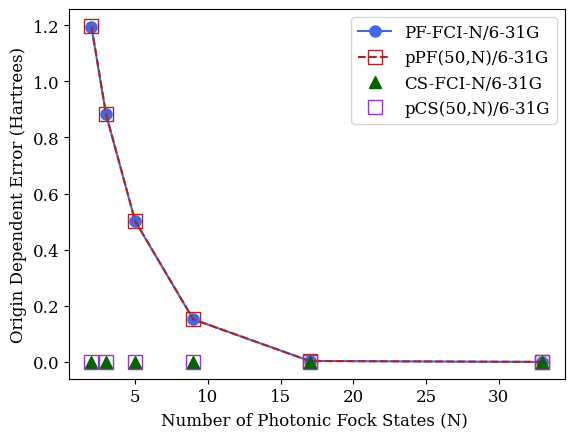

In [13]:
# pfit_pcqed = np.poly1d(pcqed_pfit)
# x_val = np.linspace(min(N_p), max(N_p), 9)
# y_val = pfit_pcqed(x_val)


COLOUR1 = "firebrick"
COLOUR2 = "darkgreen"
COLOUR3 = "royalblue"
COLOUR4 = "rebeccapurple"
COLOUR5 = 'darkorchid'
COLOUR6 = 'olivedrab'

fit_pfci = poly_eval(x_pfci, coef_pfci, 5)
fit_pcqed = poly_eval(x_pcqed_pn, coef_pcqed, 5)

plt.plot(x_pfci, y_pfci, color=COLOUR3, marker="o",  ms="8", label="PF-FCI-N/6-31G" )
plt.plot(x_pcqed_pn, y_pcqed_pn, color=COLOUR1,marker="s",  ms="10", mfc="none", linestyle="dashed", label="pPF(50,N)/6-31G" )
plt.plot(x_pcqed_pn, y_csfci, color=COLOUR2, linestyle="none", marker="^",  ms="8", label="CS-FCI-N/6-31G")
plt.plot(x_pcqed_pn, y_pcqed_cs, color=COLOUR5, linestyle="none", marker="s",  ms="10", mfc="none", label="pCS(50,N)/6-31G")
# plt.yscale("log")
plt.legend()
plt.xlabel("Number of Photonic Fock States (N) ")
plt.ylabel("Origin Dependent Error (Hartrees)")
plt.savefig("OH_minus_error_origin_dep.png", dpi=250)
plt.show()
